In [83]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os

In [84]:
def load_dataset_res(pathes, metric, metric_type=None):
    bar_values = []
    bar_stds = []
    bar_names = []
    for param in pathes:
        metric_name = f'metrics_{metric}.json' if metric_type is None else f'metrics_{metric_type}_{metric}.json'
        fname = os.path.join(param['path'], metric_name)
        with open(fname, 'r') as f:
            curr_metrics = json.loads(f.read())
        metric_values = curr_metrics[param['method']]
        mean, std = np.mean(list(metric_values.values())), np.std(list(metric_values.values()))
        bar_values.append(mean)
        bar_stds.append(std)
        bar_names.append(param['method_name'])
    return bar_values, bar_stds, bar_names

In [108]:
def plot_bar_charts(pathes, metrics, dataset, metric_type=None, ordered=False):
    def preproc_name(method, reg, score):
        name = method[0]
        if score not in ['MD', 'MP']:
            name += f'+{score[0]}'
        if reg != '-':
            name += f'+{reg[0]}'
        return name
   
    fig = plt.figure(figsize = (len(pathes), 5))
    gs = fig.add_gridspec(1, len(metrics))
    for i, metric in enumerate(metrics):
        means, stds, names = load_dataset_res(pathes, metric, metric_type)
        means = np.array(means)
        stds = np.array(stds)
        ax = fig.add_subplot(gs[0, i])

        cmap = matplotlib.cm.get_cmap('Spectral')
        colors = []
        for i in range(cmap.N):
            rgb = cmap(i)[:3]
            colors.append(matplotlib.colors.rgb2hex(rgb))
        colors = colors[::len(colors) // len(names)]
        x_pos = np.array(list(range(len(names))))
        if ordered:
            order = np.argsort(means)[::-1]
        else:
            order = x_pos
        ax.bar(x_pos, means[order], yerr=stds[order], width=0.8, align='center', alpha=1, color=colors, edgecolor='black', ecolor='black', capsize=6)
        ax.set_ylabel(f'{metric.upper()}')
        ax.set_xticks(x_pos)
        ax.set_xticklabels(x_pos[order])

        ax.tick_params(labelsize=8)
        ax.set_title(f'{metric.upper()} for {dataset}')
        ax.yaxis.grid(True)
        patches = [matplotlib.patches.Patch(color=v, label=f'{x}. {k}') for x, k, v in zip(x_pos, names, colors)]
    plt.tight_layout()
    plt.legend(handles=patches, loc='center', fontsize=10, bbox_to_anchor=(-0.1, -0.16), ncol=4, edgecolor='black')
    
    #plt.savefig(f'../../{"_".join(dataset.split(" "))}.pdf', bbox_inches='tight')
    plt.savefig(f'../../{"_".join(dataset.split(" "))}.png', bbox_inches='tight')
    plt.show()


# ELECTRA bar charts

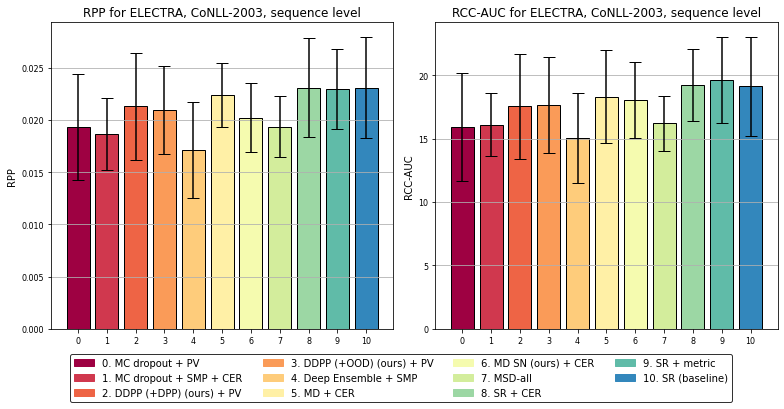

In [109]:
# Conll, seq_level
base_path = '/home/jovyan/uncertainty-estimation/workdir/final_results/'
pathes = [{'path': base_path + 'new_fixed_conll/electra_raw_no_sn/conll2003/mc_all/', 'method': 'variance', 'method_name': 'MC dropout + PV'},
          {'path': base_path + 'new_fixed_conll/electra_reg_no_sn/conll2003/mc_all/', 'method': 'sampled_max_prob', 'method_name': 'MC dropout + SMP + CER'},
          {'path': base_path + 'new_fixed_conll/electra_raw_no_sn/conll2003/ddpp_dpp_best/', 'method': 'variance', 'method_name': 'DDPP (+DPP) (ours) + PV'},
          {'path': base_path + 'new_fixed_conll/electra_raw_no_sn/conll2003/ddpp_ood_best/', 'method': 'variance', 'method_name': 'DDPP (+OOD) (ours) + PV'},
          {'path': base_path + 'new_fixed_conll/electra_raw_no_sn/conll2003/deep_ensemble/', 'method': 'sampled_max_prob', 'method_name': 'Deep Ensemble + SMP'},
          {'path': base_path + 'new_fixed_conll/electra_reg_no_sn/conll2003/maha/', 'method': 'mahalanobis_distance', 'method_name': 'MD + CER'},
          {'path': base_path + 'new_fixed_conll/electra_reg_sn/conll2003/mahalanobis/', 'method': 'mahalanobis_distance', 'method_name': 'MD SN (ours) + CER'},
          {'path': base_path + 'mixup_electra_fix_repro_fix/conll/mixup/all/', 'method': 'mixup', 'method_name': 'MSD-all'},
          {'path': base_path + 'new_fixed_conll/electra_reg_no_sn/conll2003/mc_all/', 'method': 'max_prob', 'method_name': 'SR + CER'},
          {'path': base_path + 'metric_opt_electra_param_last_fix_171/conll/all/', 'method': 'max_prob', 'method_name': 'SR + metric'},
          {'path': base_path + 'new_fixed_conll/electra_raw_no_sn/conll2003/mc_all/', 'method': 'max_prob', 'method_name': 'SR (baseline)'},]
#load_dataset_res(pathes, 'rpp', 'seq')
plot_bar_charts(pathes, ['rpp', 'rcc-auc'], 'ELECTRA, CoNLL-2003, sequence level', 'seq')

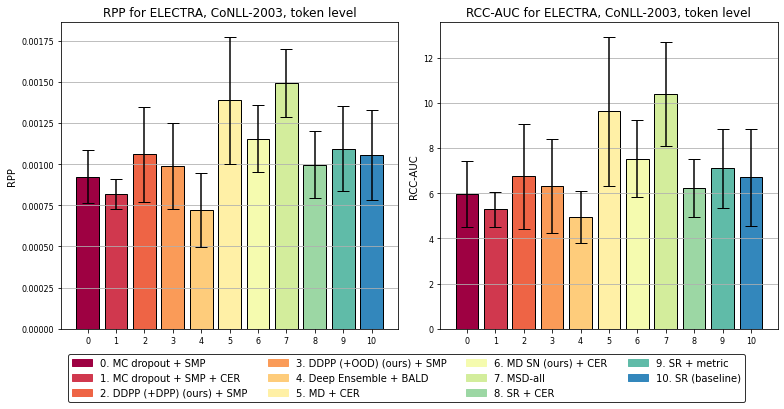

In [110]:
# Conll, tok_level
base_path = '/home/jovyan/uncertainty-estimation/workdir/final_results/'
pathes = [{'path': base_path + 'new_fixed_conll/electra_raw_no_sn/conll2003/mc_all/', 'method': 'sampled_max_prob', 'method_name': 'MC dropout + SMP'},
          {'path': base_path + 'new_fixed_conll/electra_reg_no_sn/conll2003/mc_all/', 'method': 'sampled_max_prob', 'method_name': 'MC dropout + SMP + CER'},
          {'path': base_path + 'new_fixed_conll/electra_raw_no_sn/conll2003/ddpp_dpp_best/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+DPP) (ours) + SMP'},
          {'path': base_path + 'new_fixed_conll/electra_raw_no_sn/conll2003/ddpp_ood_best/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+OOD) (ours) + SMP'},
          {'path': base_path + 'new_fixed_conll/electra_raw_no_sn/conll2003/deep_ensemble/', 'method': 'bald', 'method_name': 'Deep Ensemble + BALD'},
          {'path': base_path + 'new_fixed_conll/electra_reg_no_sn/conll2003/maha/', 'method': 'mahalanobis_distance', 'method_name': 'MD + CER'},
          {'path': base_path + 'new_fixed_conll/electra_reg_sn/conll2003/mahalanobis/', 'method': 'mahalanobis_distance', 'method_name': 'MD SN (ours) + CER'},
          {'path': base_path + 'mixup_electra_fix_repro_fix/conll/mixup/all/', 'method': 'mixup', 'method_name': 'MSD-all'},
          {'path': base_path + 'new_fixed_conll/electra_reg_no_sn/conll2003/mc_all/', 'method': 'max_prob', 'method_name': 'SR + CER'},
          {'path': base_path + 'metric_opt_electra_param_last_fix_171/conll/all/', 'method': 'max_prob', 'method_name': 'SR + metric'},
          {'path': base_path + 'new_fixed_conll/electra_raw_no_sn/conll2003/mc_all/', 'method': 'max_prob', 'method_name': 'SR (baseline)'},]
#load_dataset_res(pathes, 'rpp', 'seq')
plot_bar_charts(pathes, ['rpp', 'rcc-auc'], 'ELECTRA, CoNLL-2003, token level', 'token')

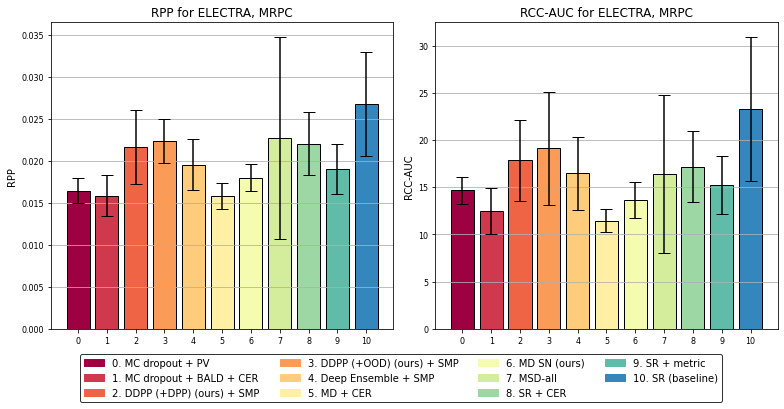

In [111]:
# MRPC
base_path = '/home/jovyan/uncertainty-estimation/workdir/final_results/'
dataset = 'mrpc'
pathes = [{'path': base_path + f'current_paper_results/electra_raw_no_sn/{dataset}/mc_all/', 'method': 'variance', 'method_name': 'MC dropout + PV'},
          {'path': base_path + f'current_paper_results/electra_reg_no_sn/{dataset}/mc_all/', 'method': 'bald', 'method_name': 'MC dropout + BALD + CER'},
          {'path': base_path + f'current_paper_results/electra_raw_no_sn/{dataset}/ddpp_dpp/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+DPP) (ours) + SMP'},
          {'path': base_path + f'current_paper_results/electra_raw_no_sn/{dataset}/ddpp_ood/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+OOD) (ours) + SMP'},
          {'path': base_path + f'current_paper_results/electra_raw_no_sn/{dataset}/deep_ensemble/', 'method': 'sampled_max_prob', 'method_name': 'Deep Ensemble + SMP'},
          {'path': base_path + f'current_paper_results/electra_reg_no_sn/{dataset}/maha/', 'method': 'mahalanobis_distance', 'method_name': 'MD + CER'},
          {'path': base_path + f'current_paper_results/electra_raw_sn/{dataset}/mahalanobis/', 'method': 'mahalanobis_distance', 'method_name': 'MD SN (ours)'},
          {'path': base_path + f'mixup_electra_fix_repro_fix/{dataset}/msd/all/', 'method': 'mixup', 'method_name': 'MSD-all'},
          {'path': base_path + f'current_paper_results/electra_reg_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR + CER'},
          {'path': base_path + f'metric_opt_electra_param_last_fix_171/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR + metric'},
          {'path': base_path + f'current_paper_results/electra_raw_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR (baseline)'},]
#load_dataset_res(pathes, 'rpp', 'seq')
plot_bar_charts(pathes, ['rpp', 'rcc-auc'], 'ELECTRA, MRPC', None)

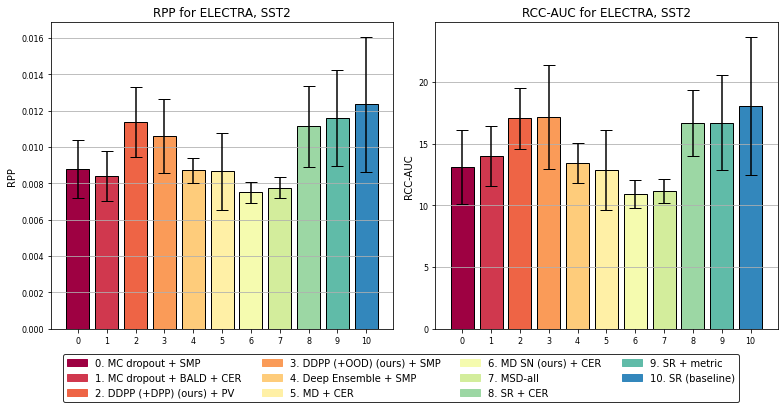

In [112]:
# SST2
base_path = '/home/jovyan/uncertainty-estimation/workdir/final_results/'
dataset = 'sst2'
pathes = [{'path': base_path + f'current_paper_results/electra_raw_no_sn/{dataset}/mc_all/', 'method': 'sampled_max_prob', 'method_name': 'MC dropout + SMP'},
          {'path': base_path + f'current_paper_results/electra_reg_no_sn/{dataset}/mc_all/', 'method': 'bald', 'method_name': 'MC dropout + BALD + CER'},
          {'path': base_path + f'current_paper_results/electra_raw_no_sn/{dataset}/ddpp_dpp/', 'method': 'variance', 'method_name': 'DDPP (+DPP) (ours) + PV'},
          {'path': base_path + f'current_paper_results/electra_raw_no_sn/{dataset}/ddpp_ood/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+OOD) (ours) + SMP'},
          {'path': base_path + f'current_paper_results/electra_raw_no_sn/{dataset}/deep_ensemble/', 'method': 'sampled_max_prob', 'method_name': 'Deep Ensemble + SMP'},
          {'path': base_path + f'current_paper_results/electra_reg_no_sn/{dataset}/maha/', 'method': 'mahalanobis_distance', 'method_name': 'MD + CER'},
          {'path': base_path + f'current_paper_results/electra_reg_sn/{dataset}/mahalanobis/', 'method': 'mahalanobis_distance', 'method_name': 'MD SN (ours) + CER'},
          {'path': base_path + f'mixup_electra_fix_repro_fix/{dataset}/msd/all/', 'method': 'mixup', 'method_name': 'MSD-all'},
          {'path': base_path + f'current_paper_results/electra_reg_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR + CER'},
          {'path': base_path + f'metric_opt_electra_param_last_fix_171/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR + metric'},
          {'path': base_path + f'current_paper_results/electra_raw_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR (baseline)'},]
#load_dataset_res(pathes, 'rpp', 'seq')
plot_bar_charts(pathes, ['rpp', 'rcc-auc'], 'ELECTRA, SST2', None)

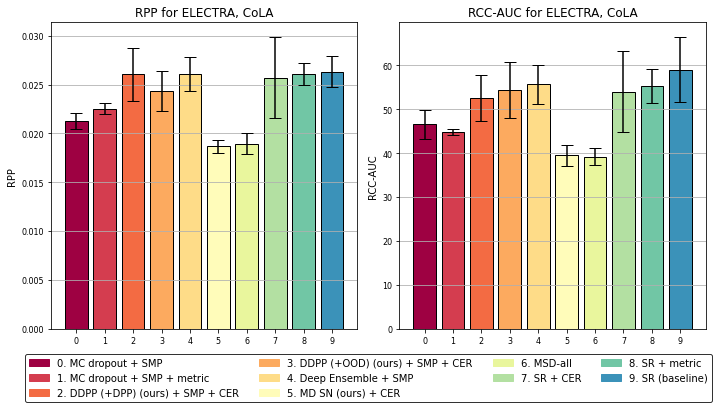

In [113]:
# Cola
base_path = '/home/jovyan/uncertainty-estimation/workdir/final_results/'
dataset = 'cola'
pathes = [{'path': base_path + f'current_paper_results/electra_raw_no_sn/{dataset}/mc_all/', 'method': 'sampled_max_prob', 'method_name': 'MC dropout + SMP'},
          {'path': base_path + f'metric_opt_electra_param_last_fix_171/{dataset}/all/', 'method': 'sampled_max_prob', 'method_name': 'MC dropout + SMP + metric'},
          {'path': base_path + f'current_paper_results/electra_reg_no_sn/{dataset}/ddpp_dpp/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+DPP) (ours) + SMP + CER'},
          {'path': base_path + f'current_paper_results/electra_reg_no_sn/{dataset}/ddpp_ood/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+OOD) (ours) + SMP + CER'},
          {'path': base_path + f'current_paper_results/electra_raw_no_sn/{dataset}/deep_ensemble/', 'method': 'sampled_max_prob', 'method_name': 'Deep Ensemble + SMP'},
          #{'path': base_path + f'current_paper_results/electra_reg_no_sn/{dataset}/maha/', 'method': 'mahalanobis_distance', 'method_name': 'MD + CER'},
          {'path': base_path + f'current_paper_results/electra_reg_sn/{dataset}/mahalanobis/', 'method': 'mahalanobis_distance', 'method_name': 'MD SN (ours) + CER'},
          {'path': base_path + f'mixup_electra_fix_repro_fix/{dataset}/msd/all/', 'method': 'mixup', 'method_name': 'MSD-all'},
          {'path': base_path + f'current_paper_results/electra_reg_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR + CER'},
          {'path': base_path + f'metric_opt_electra_param_last_fix_171/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR + metric'},
          {'path': base_path + f'current_paper_results/electra_raw_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR (baseline)'},]
#load_dataset_res(pathes, 'rpp', 'seq')
plot_bar_charts(pathes, ['rpp', 'rcc-auc'], 'ELECTRA, CoLA', None)

# DEBERTA bar charts

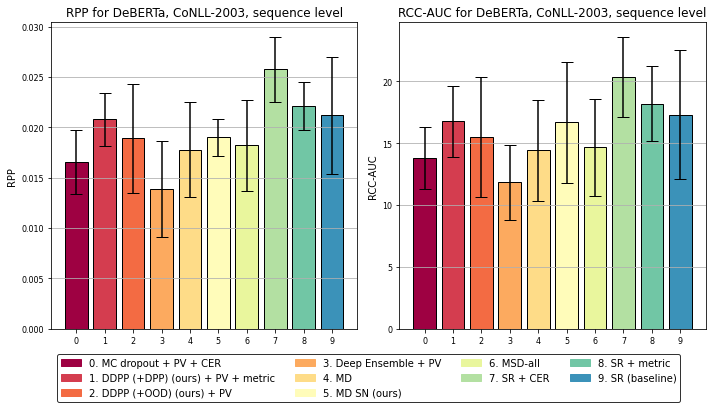

In [114]:
# Conll, seq level
base_path = '/home/jovyan/uncertainty-estimation/workdir/final_results/'
dataset = 'conll2003'
pathes = [{'path': base_path + f'deberta/deberta_reg_no_sn/{dataset}/mc_all/', 'method': 'variance', 'method_name': 'MC dropout + PV + CER'},
          {'path': base_path + f'deberta/deberta_metric_no_sn/{dataset}/ddpp_dpp/', 'method': 'variance', 'method_name': 'DDPP (+DPP) (ours) + PV + metric'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/ddpp_ood/', 'method': 'variance', 'method_name': 'DDPP (+OOD) (ours) + PV'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/deep_ensemble/', 'method': 'variance', 'method_name': 'Deep Ensemble + PV'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/mahalanobis/', 'method': 'mahalanobis_distance', 'method_name': 'MD'},
          {'path': base_path + f'deberta/deberta_raw_sn/{dataset}/mahalanobis/', 'method': 'mahalanobis_distance', 'method_name': 'MD SN (ours)'},
          {'path': base_path + f'mixup_deberta_fix_repro_fix/conll/mixup/all/', 'method': 'mixup', 'method_name': 'MSD-all'},
          {'path': base_path + f'deberta/deberta_reg_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR + CER'},
          {'path': base_path + f'deberta/deberta_metric_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR + metric'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR (baseline)'},]
#load_dataset_res(pathes, 'rpp', 'seq')
plot_bar_charts(pathes, ['rpp', 'rcc-auc'], 'DeBERTa, CoNLL-2003, sequence level', 'seq')

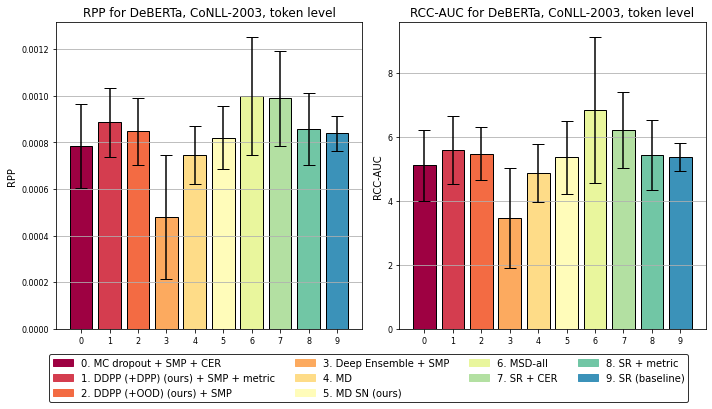

In [115]:
# Conll, tok level
base_path = '/home/jovyan/uncertainty-estimation/workdir/final_results/'
dataset = 'conll2003'
pathes = [{'path': base_path + f'deberta/deberta_reg_no_sn/{dataset}/mc_all/', 'method': 'sampled_max_prob', 'method_name': 'MC dropout + SMP + CER'},
          {'path': base_path + f'deberta/deberta_metric_no_sn/{dataset}/ddpp_dpp/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+DPP) (ours) + SMP + metric'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/ddpp_ood/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+OOD) (ours) + SMP'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/deep_ensemble/', 'method': 'sampled_max_prob', 'method_name': 'Deep Ensemble + SMP'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/mahalanobis/', 'method': 'mahalanobis_distance', 'method_name': 'MD'},
          {'path': base_path + f'deberta/deberta_raw_sn/{dataset}/mahalanobis/', 'method': 'mahalanobis_distance', 'method_name': 'MD SN (ours)'},
          {'path': base_path + f'mixup_deberta_fix_repro_fix/conll/mixup/all/', 'method': 'mixup', 'method_name': 'MSD-all'},
          {'path': base_path + f'deberta/deberta_reg_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR + CER'},
          {'path': base_path + f'deberta/deberta_metric_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR + metric'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR (baseline)'},]
#load_dataset_res(pathes, 'rpp', 'seq')
plot_bar_charts(pathes, ['rpp', 'rcc-auc'], 'DeBERTa, CoNLL-2003, token level', 'token')

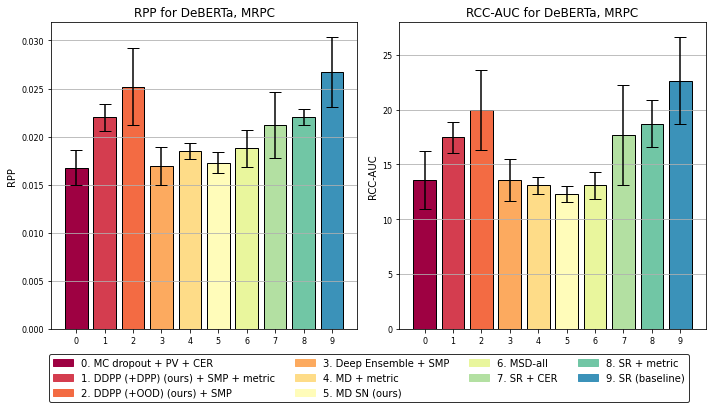

In [116]:
# MRPC
base_path = '/home/jovyan/uncertainty-estimation/workdir/final_results/'
dataset = 'mrpc'
pathes = [{'path': base_path + f'deberta/deberta_reg_no_sn/{dataset}/mc_all/', 'method': 'variance', 'method_name': 'MC dropout + PV + CER'},
          {'path': base_path + f'deberta/deberta_metric_no_sn/{dataset}/ddpp_dpp/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+DPP) (ours) + SMP + metric'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/ddpp_ood/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+OOD) (ours) + SMP'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/deep_ensemble/', 'method': 'sampled_max_prob', 'method_name': 'Deep Ensemble + SMP'},
          {'path': base_path + f'deberta/deberta_metric_no_sn/{dataset}/mahalanobis/', 'method': 'mahalanobis_distance', 'method_name': 'MD + metric'},
          {'path': base_path + f'deberta/deberta_raw_sn/{dataset}/mahalanobis/', 'method': 'mahalanobis_distance', 'method_name': 'MD SN (ours)'},
          {'path': base_path + f'mixup_deberta_fix_repro_fix/{dataset}/msd/all/', 'method': 'mixup', 'method_name': 'MSD-all'},
          {'path': base_path + f'deberta/deberta_reg_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR + CER'},
          {'path': base_path + f'deberta/deberta_metric_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR + metric'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR (baseline)'},]
#load_dataset_res(pathes, 'rpp', 'seq')
plot_bar_charts(pathes, ['rpp', 'rcc-auc'], 'DeBERTa, MRPC', None)

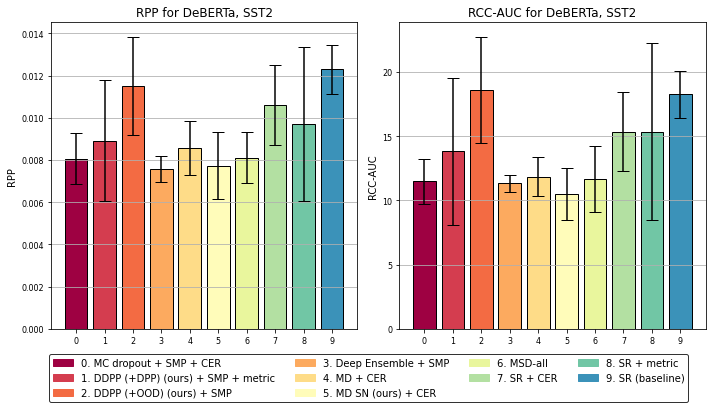

In [117]:
# SST2
base_path = '/home/jovyan/uncertainty-estimation/workdir/final_results/'
dataset = 'sst2'
pathes = [{'path': base_path + f'deberta/deberta_reg_no_sn/{dataset}/mc_all/', 'method': 'sampled_max_prob', 'method_name': 'MC dropout + SMP + CER'},
          {'path': base_path + f'deberta/deberta_metric_no_sn/{dataset}/ddpp_dpp/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+DPP) (ours) + SMP + metric'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/ddpp_ood/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+OOD) (ours) + SMP'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/deep_ensemble/', 'method': 'sampled_max_prob', 'method_name': 'Deep Ensemble + SMP'},
          {'path': base_path + f'deberta/deberta_reg_no_sn/{dataset}/mahalanobis/', 'method': 'mahalanobis_distance', 'method_name': 'MD + CER'},
          {'path': base_path + f'deberta/deberta_reg_sn/{dataset}/mahalanobis/', 'method': 'mahalanobis_distance', 'method_name': 'MD SN (ours) + CER'},
          {'path': base_path + f'mixup_deberta_fix_repro_fix/{dataset}/msd/all/', 'method': 'mixup', 'method_name': 'MSD-all'},
          {'path': base_path + f'deberta/deberta_reg_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR + CER'},
          {'path': base_path + f'deberta/deberta_metric_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR + metric'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR (baseline)'},]
#load_dataset_res(pathes, 'rpp', 'seq')
plot_bar_charts(pathes, ['rpp', 'rcc-auc'], 'DeBERTa, SST2', None)

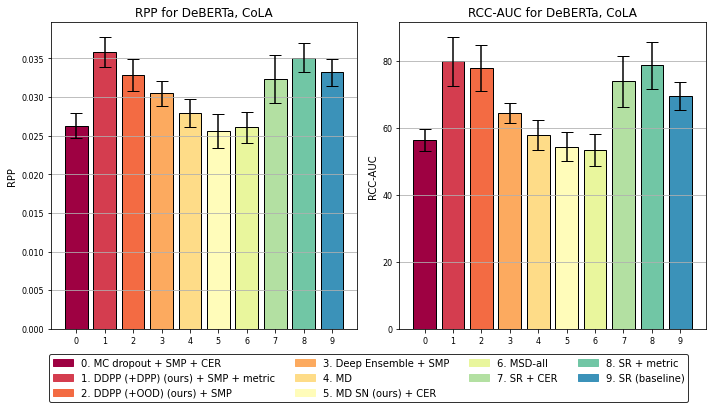

In [118]:
# CoLA
base_path = '/home/jovyan/uncertainty-estimation/workdir/final_results/'
dataset = 'cola'
pathes = [{'path': base_path + f'deberta/deberta_reg_no_sn/{dataset}/mc_all/', 'method': 'sampled_max_prob', 'method_name': 'MC dropout + SMP + CER'},
          {'path': base_path + f'deberta/deberta_metric_no_sn/{dataset}/ddpp_dpp/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+DPP) (ours) + SMP + metric'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/ddpp_ood/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+OOD) (ours) + SMP'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/deep_ensemble/', 'method': 'sampled_max_prob', 'method_name': 'Deep Ensemble + SMP'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/mahalanobis/', 'method': 'mahalanobis_distance', 'method_name': 'MD'},
          {'path': base_path + f'deberta/deberta_reg_sn/{dataset}/mahalanobis/', 'method': 'mahalanobis_distance', 'method_name': 'MD SN (ours) + CER'},
          {'path': base_path + f'mixup_deberta_fix_repro_fix/{dataset}/msd/all/', 'method': 'mixup', 'method_name': 'MSD-all'},
          {'path': base_path + f'deberta/deberta_reg_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR + CER'},
          {'path': base_path + f'deberta/deberta_metric_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR + metric'},
          {'path': base_path + f'deberta/deberta_raw_no_sn/{dataset}/mc_all/', 'method': 'max_prob', 'method_name': 'SR (baseline)'},]
#load_dataset_res(pathes, 'rpp', 'seq')
plot_bar_charts(pathes, ['rpp', 'rcc-auc'], 'DeBERTa, CoLA', None)

# Distilbert bar charts

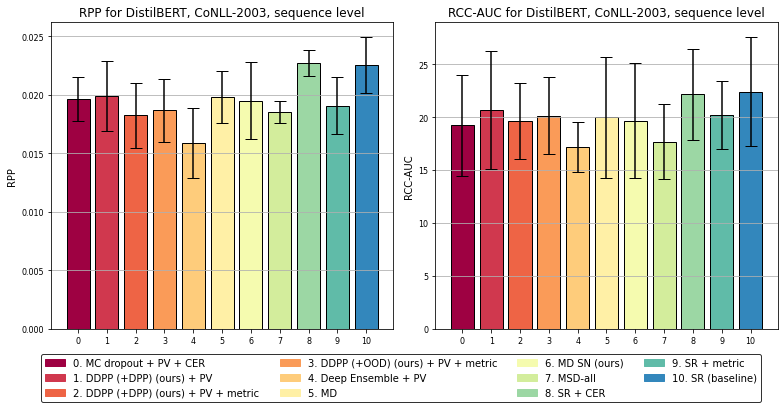

In [119]:
# Conll, seq level
base_path = '/home/jovyan/uncertainty-estimation/workdir/final_results/'
dataset = 'conll'
pathes = [{'path': base_path + f'distilbert/cer/{dataset}/all/', 'method': 'variance', 'method_name': 'MC dropout + PV + CER'},
          {'path': base_path + f'distilbert/raw/{dataset}/dpp/', 'method': 'variance', 'method_name': 'DDPP (+DPP) (ours) + PV'},
          {'path': base_path + f'distilbert/metric_171/{dataset}/dpp/', 'method': 'variance', 'method_name': 'DDPP (+DPP) (ours) + PV + metric'},
          {'path': base_path + f'distilbert/metric_171/{dataset}/dpp_with_ood/', 'method': 'variance', 'method_name': 'DDPP (+OOD) (ours) + PV + metric'},
          {'path': base_path + f'distilbert_ensemble/conll2003/de/', 'method': 'variance', 'method_name': 'Deep Ensemble + PV'},
          {'path': base_path + f'distilbert/raw/{dataset}/maha/', 'method': 'mahalanobis_distance', 'method_name': 'MD'},
          {'path': base_path + f'distilbert/raw_sn/{dataset}/maha_sn/', 'method': 'mahalanobis_distance', 'method_name': 'MD SN (ours)'},
          {'path': base_path + f'mixup_distilbert_fix_repro_fix/{dataset}/mixup/all/', 'method': 'mixup', 'method_name': 'MSD-all'},
          {'path': base_path + f'distilbert/cer/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR + CER'},
          {'path': base_path + f'distilbert/metric_171/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR + metric'},
          {'path': base_path + f'distilbert/raw/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR (baseline)'},]
#load_dataset_res(pathes, 'rpp', 'seq')
plot_bar_charts(pathes, ['rpp', 'rcc-auc'], 'DistilBERT, CoNLL-2003, sequence level', 'seq')

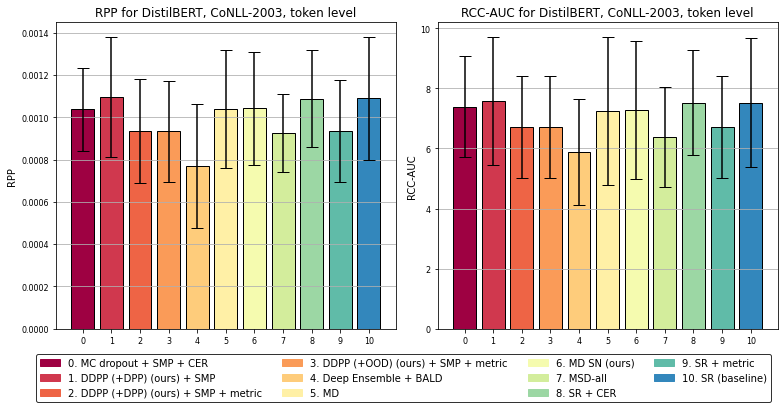

In [120]:
# Conll, token level
base_path = '/home/jovyan/uncertainty-estimation/workdir/final_results/'
dataset = 'conll'
pathes = [{'path': base_path + f'distilbert/cer/{dataset}/all/', 'method': 'sampled_max_prob', 'method_name': 'MC dropout + SMP + CER'},
          {'path': base_path + f'distilbert/raw/{dataset}/dpp/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+DPP) (ours) + SMP'},
          {'path': base_path + f'distilbert/metric_171/{dataset}/dpp/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+DPP) (ours) + SMP + metric'},
          {'path': base_path + f'distilbert/metric_171/{dataset}/dpp_with_ood/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+OOD) (ours) + SMP + metric'},
          {'path': base_path + f'distilbert_ensemble/conll2003/de/', 'method': 'bald', 'method_name': 'Deep Ensemble + BALD'},
          {'path': base_path + f'distilbert/raw/{dataset}/maha/', 'method': 'mahalanobis_distance', 'method_name': 'MD'},
          {'path': base_path + f'distilbert/raw_sn/{dataset}/maha_sn/', 'method': 'mahalanobis_distance', 'method_name': 'MD SN (ours)'},
          {'path': base_path + f'mixup_distilbert_fix_repro_fix/{dataset}/mixup/all/', 'method': 'mixup', 'method_name': 'MSD-all'},
          {'path': base_path + f'distilbert/cer/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR + CER'},
          {'path': base_path + f'distilbert/metric_171/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR + metric'},
          {'path': base_path + f'distilbert/raw/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR (baseline)'},]
#load_dataset_res(pathes, 'rpp', 'seq')
plot_bar_charts(pathes, ['rpp', 'rcc-auc'], 'DistilBERT, CoNLL-2003, token level', 'token')

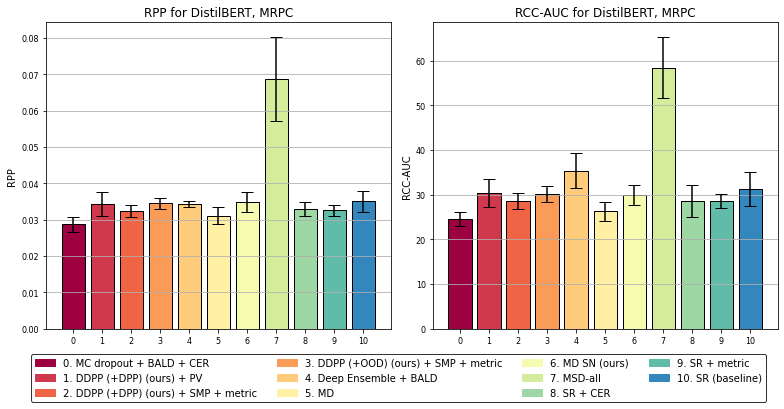

In [121]:
# MRPC
base_path = '/home/jovyan/uncertainty-estimation/workdir/final_results/'
dataset = 'mrpc'
pathes = [{'path': base_path + f'distilbert/cer/{dataset}/all/', 'method': 'bald', 'method_name': 'MC dropout + BALD + CER'},
          {'path': base_path + f'distilbert/raw/{dataset}/dpp/', 'method': 'variance', 'method_name': 'DDPP (+DPP) (ours) + PV'},
          {'path': base_path + f'distilbert/metric_171/{dataset}/dpp/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+DPP) (ours) + SMP + metric'},
          {'path': base_path + f'distilbert/metric_171/{dataset}/dpp_with_ood/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+OOD) (ours) + SMP + metric'},
          {'path': base_path + f'distilbert_ensemble/{dataset}/de/', 'method': 'bald', 'method_name': 'Deep Ensemble + BALD'},
          {'path': base_path + f'distilbert/raw/{dataset}/maha/', 'method': 'mahalanobis_distance', 'method_name': 'MD'},
          {'path': base_path + f'distilbert/raw_sn/{dataset}/maha_sn/', 'method': 'mahalanobis_distance', 'method_name': 'MD SN (ours)'},
          {'path': base_path + f'mixup_distilbert_fix_repro_fix/{dataset}/msd/all/', 'method': 'mixup', 'method_name': 'MSD-all'},
          {'path': base_path + f'distilbert/cer/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR + CER'},
          {'path': base_path + f'distilbert/metric_171/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR + metric'},
          {'path': base_path + f'distilbert/raw/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR (baseline)'},]
#load_dataset_res(pathes, 'rpp', 'seq')
plot_bar_charts(pathes, ['rpp', 'rcc-auc'], 'DistilBERT, MRPC', None)

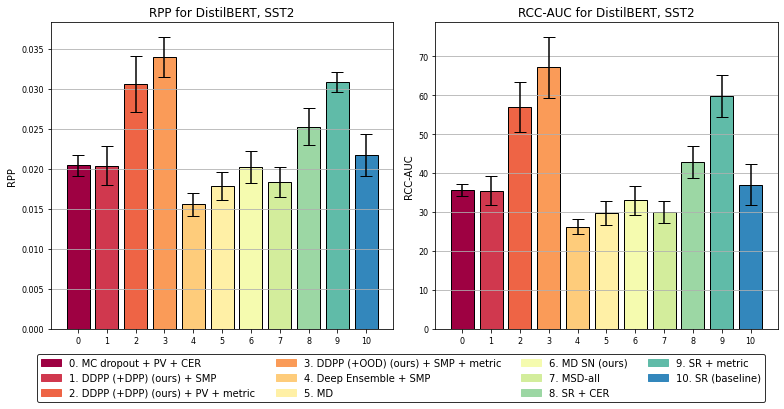

In [122]:
# SST2
base_path = '/home/jovyan/uncertainty-estimation/workdir/final_results/'
dataset = 'sst2'
pathes = [{'path': base_path + f'distilbert/cer/{dataset}/all/', 'method': 'variance', 'method_name': 'MC dropout + PV + CER'},
          {'path': base_path + f'distilbert/raw/{dataset}/dpp/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+DPP) (ours) + SMP'},
          {'path': base_path + f'distilbert/metric_171/{dataset}/dpp/', 'method': 'variance', 'method_name': 'DDPP (+DPP) (ours) + PV + metric'},
          {'path': base_path + f'distilbert/metric_171/{dataset}/dpp_with_ood/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+OOD) (ours) + SMP + metric'},
          {'path': base_path + f'distilbert_ensemble/{dataset}/de/', 'method': 'sampled_max_prob', 'method_name': 'Deep Ensemble + SMP'},
          {'path': base_path + f'distilbert/raw/{dataset}/maha/', 'method': 'mahalanobis_distance', 'method_name': 'MD'},
          {'path': base_path + f'distilbert/raw_sn/{dataset}/maha_sn/', 'method': 'mahalanobis_distance', 'method_name': 'MD SN (ours)'},
          {'path': base_path + f'mixup_distilbert_fix_repro_fix/{dataset}/msd/all/', 'method': 'mixup', 'method_name': 'MSD-all'},
          {'path': base_path + f'distilbert/cer/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR + CER'},
          {'path': base_path + f'distilbert/metric_171/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR + metric'},
          {'path': base_path + f'distilbert/raw/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR (baseline)'},]
#load_dataset_res(pathes, 'rpp', 'seq')
plot_bar_charts(pathes, ['rpp', 'rcc-auc'], 'DistilBERT, SST2', None)

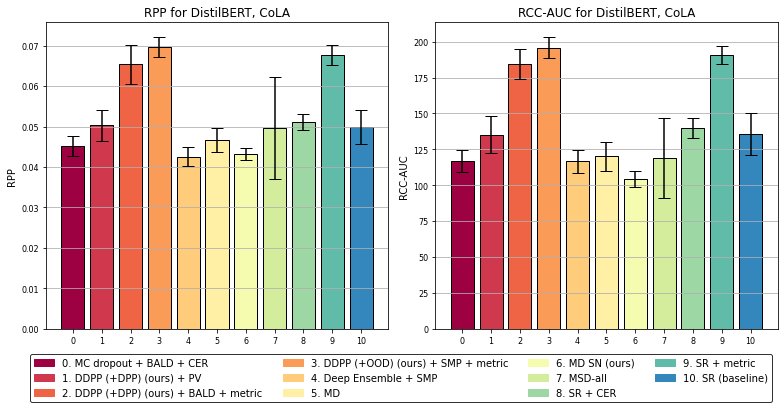

In [123]:
# CoLA
base_path = '/home/jovyan/uncertainty-estimation/workdir/final_results/'
dataset = 'cola'
pathes = [{'path': base_path + f'distilbert/cer/{dataset}/all/', 'method': 'bald', 'method_name': 'MC dropout + BALD + CER'},
          {'path': base_path + f'distilbert/raw/{dataset}/dpp/', 'method': 'variance', 'method_name': 'DDPP (+DPP) (ours) + PV'},
          {'path': base_path + f'distilbert/metric_171/{dataset}/dpp/', 'method': 'bald', 'method_name': 'DDPP (+DPP) (ours) + BALD + metric'},
          {'path': base_path + f'distilbert/metric_171/{dataset}/dpp_with_ood/', 'method': 'sampled_max_prob', 'method_name': 'DDPP (+OOD) (ours) + SMP + metric'},
          {'path': base_path + f'distilbert_ensemble/{dataset}/de/', 'method': 'sampled_max_prob', 'method_name': 'Deep Ensemble + SMP'},
          {'path': base_path + f'distilbert/raw/{dataset}/maha/', 'method': 'mahalanobis_distance', 'method_name': 'MD'},
          {'path': base_path + f'distilbert/raw_sn/{dataset}/maha_sn/', 'method': 'mahalanobis_distance', 'method_name': 'MD SN (ours)'},
          {'path': base_path + f'mixup_distilbert_fix_repro_fix/{dataset}/msd/all/', 'method': 'mixup', 'method_name': 'MSD-all'},
          {'path': base_path + f'distilbert/cer/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR + CER'},
          {'path': base_path + f'distilbert/metric_171/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR + metric'},
          {'path': base_path + f'distilbert/raw/{dataset}/all/', 'method': 'max_prob', 'method_name': 'SR (baseline)'},]
#load_dataset_res(pathes, 'rpp', 'seq')
plot_bar_charts(pathes, ['rpp', 'rcc-auc'], 'DistilBERT, CoLA', None)